<a href="https://colab.research.google.com/github/ijinshes2ly/seasonal_regression/blob/main/GM_D29_seasonal_rg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     35.74
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           3.16e-08
Time:                        00:20:55   Log-Likelihood:                -54.719
No. Observations:                  24   AIC:                             117.4
Df Residuals:                      20   BIC:                             122.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4226      1.166     44.944      0.0

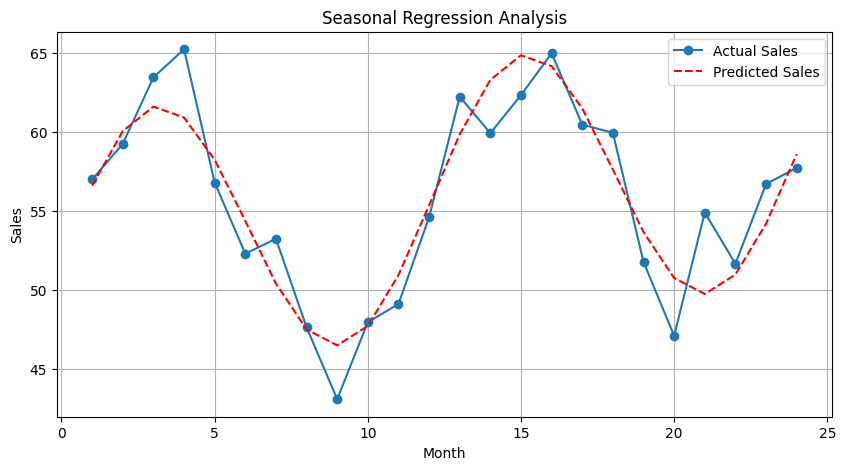

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 생성 (12개월 주기의 계절성을 가진 시계열 데이터)
np.random.seed(42)
months = np.arange(1, 25)  # 2년 (24개월) 데이터
seasonal_effect = 10 * np.sin(2 * np.pi * months / 12)  # 계절성 반영 (사인 함수)
trend = 0.5 * months  # 증가하는 추세
noise = np.random.normal(0, 3, size=len(months))  # 랜덤 노이즈 추가
y = 50 + trend + seasonal_effect + noise  # 최종 데이터

# 데이터프레임 생성
df = pd.DataFrame({"Month": months, "Sales": y})
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)  # 계절성을 위한 사인 변환
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)  # 계절성을 위한 코사인 변환

# 독립 변수 설정 (추세 + 계절성 반영)
X = df[["Month", "Month_sin", "Month_cos"]]
X = sm.add_constant(X)  # 상수 추가 (절편)

# 회귀 분석 수행
model = sm.OLS(df["Sales"], X).fit()

# 결과 출력
print(model.summary())

# 예측 값 계산
df["Predicted"] = model.predict(X)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["Sales"], label="Actual Sales", marker='o')
plt.plot(df["Month"], df["Predicted"], label="Predicted Sales", linestyle="dashed", color="red")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Seasonal Regression Analysis")
plt.legend()
plt.grid()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 데이터 생성 설정
np.random.seed(42)
months = np.arange(1, 25)  # 2년(24개월) 데이터
seasonal_effect = 20 * np.sin(2 * np.pi * months / 12)  # 계절성 반영 (사인 함수)
trend = 2 * months  # 증가하는 추세
noise = np.random.normal(0, 5, size=len(months))  # 랜덤 노이즈 추가

# 광고비, 트래픽, 프로모션 여부 설정
ad_spend = np.random.randint(50, 150, size=len(months))  # 광고비 (랜덤)
traffic = np.random.randint(1000, 5000, size=len(months))  # 방문자 수 (랜덤)
promotion = np.random.choice([0, 1], size=len(months), p=[0.7, 0.3])  # 프로모션 여부 (30% 확률)

# 최종 매출 데이터 생성 (광고비, 트래픽, 프로모션이 영향을 미침)
sales = 200 + (0.8 * ad_spend) + (0.05 * traffic) + (50 * promotion) + trend + seasonal_effect + noise

# 데이터프레임 생성
df = pd.DataFrame({
    "Month": months,
    "Ad_Spend": ad_spend,
    "Traffic": traffic,
    "Promotion": promotion,
    "Sales": sales
})

# 계절성 반영을 위한 사인 및 코사인 추가
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

# 데이터 확인 (상위 5개 행 출력)
print(df.head())


   Month  Ad_Spend  Traffic  Promotion       Sales  Month_sin     Month_cos
0      1       113     3253          1  517.533571   0.500000  8.660254e-01
1      2        52     4152          0  469.829187   0.866025  5.000000e-01
2      3       100     2955          0  456.988443   1.000000  6.123234e-17
3      4        56     2585          0  406.985657   0.866025 -5.000000e-01
4      5        70     4943          0  521.979233   0.500000 -8.660254e-01


Mean Absolute Error (MAE): 8.61
R-squared (R²): 0.9520


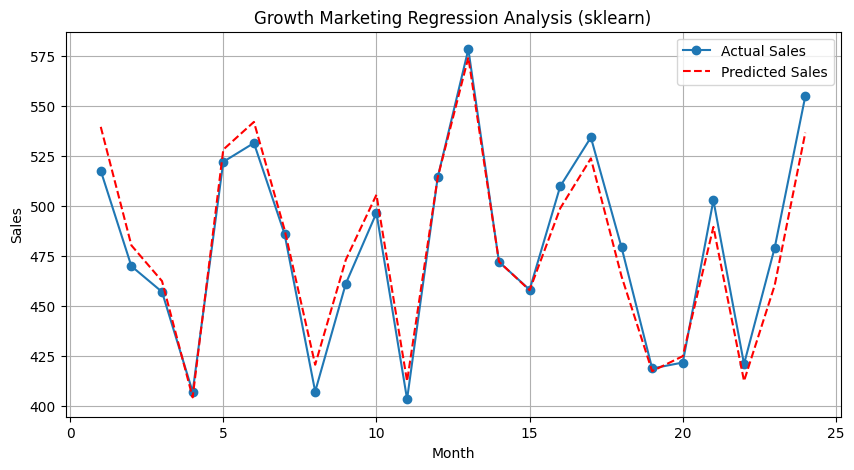

In [3]:
# 독립 변수 (계절성 반영)
X = df[["Ad_Spend", "Traffic", "Promotion", "Month_sin", "Month_cos"]]
y = df["Sales"]

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측 값 계산
df["Predicted_Sales"] = model.predict(X)

# 성능 평가
mae = mean_absolute_error(df["Sales"], df["Predicted_Sales"])
r2 = r2_score(df["Sales"], df["Predicted_Sales"])
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["Sales"], label="Actual Sales", marker='o')
plt.plot(df["Month"], df["Predicted_Sales"], label="Predicted Sales", linestyle="dashed", color="red")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Growth Marketing Regression Analysis (sklearn)")
plt.legend()
plt.grid()
plt.show()


* 이 그래프는 2010년부터 2024년까지 세계적으로 인기 있었던 K-드라마와 해당 시기에 화장품 유통 증가율 간의 관계를 나타냄.
* 빨간 점은 특정 드라마가 방영된 연도와 그 시기의 화장품 유통 증가율(%)을 나타냄.
* 점선을 따라 K-드라마가 인기를 끌면서 화장품 유통이 어떻게 변했는지를 확인할 수 있습니다

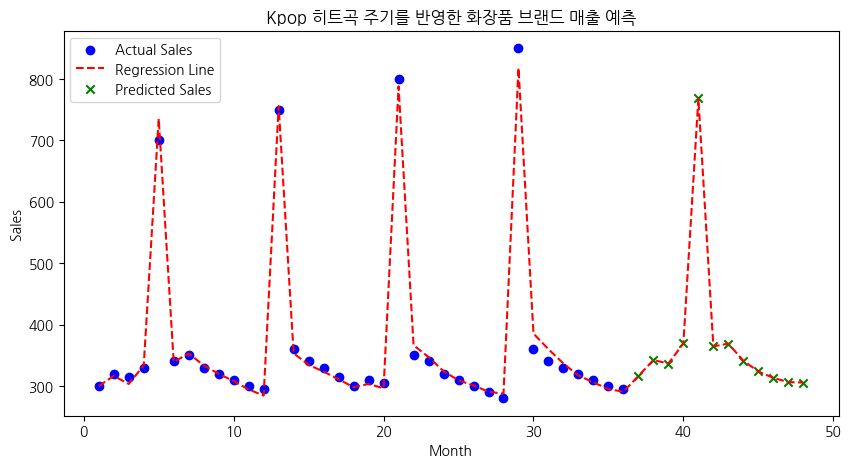

Mean Absolute Error (MAE): 7.67
R² Score: 0.99
    Month  Ad_Spend  SNS_Viral_Score  Traffic  Promotion  Hit_Song_Sin  \
0      37        80              1.5     1200          0 -1.490423e-01   
1      38       100              2.0     1300          0 -6.801727e-01   
2      39        90              1.8     1250          0 -9.749279e-01   
3      40       110              2.2     1350          1 -9.308737e-01   
4      41       220              8.0     4200          1 -5.633201e-01   
5      42       120              3.0     1400          0 -9.797174e-16   
6      43       130              3.5     1450          0  5.633201e-01   
7      44       110              2.5     1300          0  9.308737e-01   
8      45       100              2.0     1200          0  9.749279e-01   
9      46        90              1.8     1150          0  6.801727e-01   
10     47        80              1.5     1100          0  1.490423e-01   
11     48        75              1.0     1050          0 -4.33883

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1. 데이터 딕셔너리 정의 (Kpop 히트곡 주기성만 반영)
months = np.arange(1, 37)  # 1~36개월 데이터

data = {
    "Month": months,
    "Sales": [
        300, 320, 315, 330, 700, 340, 350, 330, 320, 310, 300, 295,
        750, 360, 340, 330, 315, 300, 310, 305, 800, 350, 340, 320,
        310, 300, 290, 280, 850, 360, 340, 330, 320, 310, 300, 295
    ],
    "Ad_Spend": [
        80, 100, 90, 110, 220, 120, 130, 110, 100, 90, 80, 75,
        240, 140, 120, 110, 95, 80, 90, 85, 260, 130, 120, 100,
        90, 80, 70, 60, 280, 140, 130, 110, 100, 90, 80, 75
    ],
    "SNS_Viral_Score": [
        1.5, 2, 1.8, 2.2, 8, 3, 3.5, 2.5, 2, 1.8, 1.5, 1,
        9, 4, 3.5, 3, 2.5, 2, 1.5, 1.2, 10, 5, 4.5, 4,
        3.5, 2.5, 2, 1.5, 12, 4, 3.8, 3.2, 2.7, 2.1, 1.8, 1.3
    ],
    "Traffic": [
        1200, 1300, 1250, 1350, 4200, 1400, 1450, 1300, 1200, 1150, 1100, 1050,
        4300, 1500, 1400, 1300, 1200, 1100, 1050, 1000, 4400, 1600, 1500, 1400,
        1300, 1200, 1100, 1050, 4600, 1550, 1400, 1300, 1200, 1150, 1100, 1050
    ],
    "Promotion": [
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0
    ]
}

# 2. Kpop 히트곡 주기를 반영한 주기 변수 추가 (9~12개월 주기, 평균 10.5개월)
data["Hit_Song_Sin"] = np.sin(2 * np.pi * data["Month"] / 10.5)
data["Hit_Song_Cos"] = np.cos(2 * np.pi * data["Month"] / 10.5)

# 3. 딕셔너리를 DataFrame으로 변환
df = pd.DataFrame(data)

# 4. 선형 회귀 분석을 위한 데이터 준비
X = df[["Month", "Ad_Spend", "SNS_Viral_Score", "Traffic", "Promotion", "Hit_Song_Sin", "Hit_Song_Cos"]]
y = df["Sales"]

# 5. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 6. 향후 12개월 예측 (37~48개월)
future_months = np.arange(37, 49)
future_data = {
    "Month": future_months,
    "Ad_Spend": [80, 100, 90, 110, 220, 120, 130, 110, 100, 90, 80, 75],
    "SNS_Viral_Score": [1.5, 2, 1.8, 2.2, 8, 3, 3.5, 2.5, 2, 1.8, 1.5, 1],
    "Traffic": [1200, 1300, 1250, 1350, 4200, 1400, 1450, 1300, 1200, 1150, 1100, 1050],
    "Promotion": [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
}

# 7. Kpop 히트곡 주기 반영 (향후 12개월)
future_data["Hit_Song_Sin"] = np.sin(2 * np.pi * future_data["Month"] / 10.5)
future_data["Hit_Song_Cos"] = np.cos(2 * np.pi * future_data["Month"] / 10.5)

# 8. DataFrame 변환 후 매출 예측
future_df = pd.DataFrame(future_data)
predicted_sales = model.predict(future_df)

# 9. 결과 시각화 (점선 연결)
plt.figure(figsize=(10, 5))

# 실제 데이터 점 (파란색)
plt.scatter(df["Month"], df["Sales"], color="blue", label="Actual Sales")

# 기존 데이터 + 예측 데이터를 하나의 배열로 연결
combined_months = np.concatenate((df["Month"], future_df["Month"]))
combined_sales = np.concatenate((model.predict(X), predicted_sales))

# 점선 스타일로 회귀선 표시
plt.plot(combined_months, combined_sales, color="red", linestyle="dashed", label="Regression Line")

# 예측값 (녹색 X)
plt.scatter(future_df["Month"], predicted_sales, color="green", marker="x", label="Predicted Sales")

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Kpop 히트곡 주기를 반영한 화장품 브랜드 매출 예측")
plt.legend()
plt.show()

# 10. 성능 평가
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 11. 향후 12개월 예측값 출력
future_df["Predicted_Sales"] = predicted_sales
print(future_df)


<ipython-input-15-0c7dfb569f7e>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  날짜_인덱스 = pd.date_range(start='2010-01-01', periods=60, freq='3M')
<ipython-input-15-0c7dfb569f7e>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  회귀_df['예측_수출액'] = 모델.predict(X)


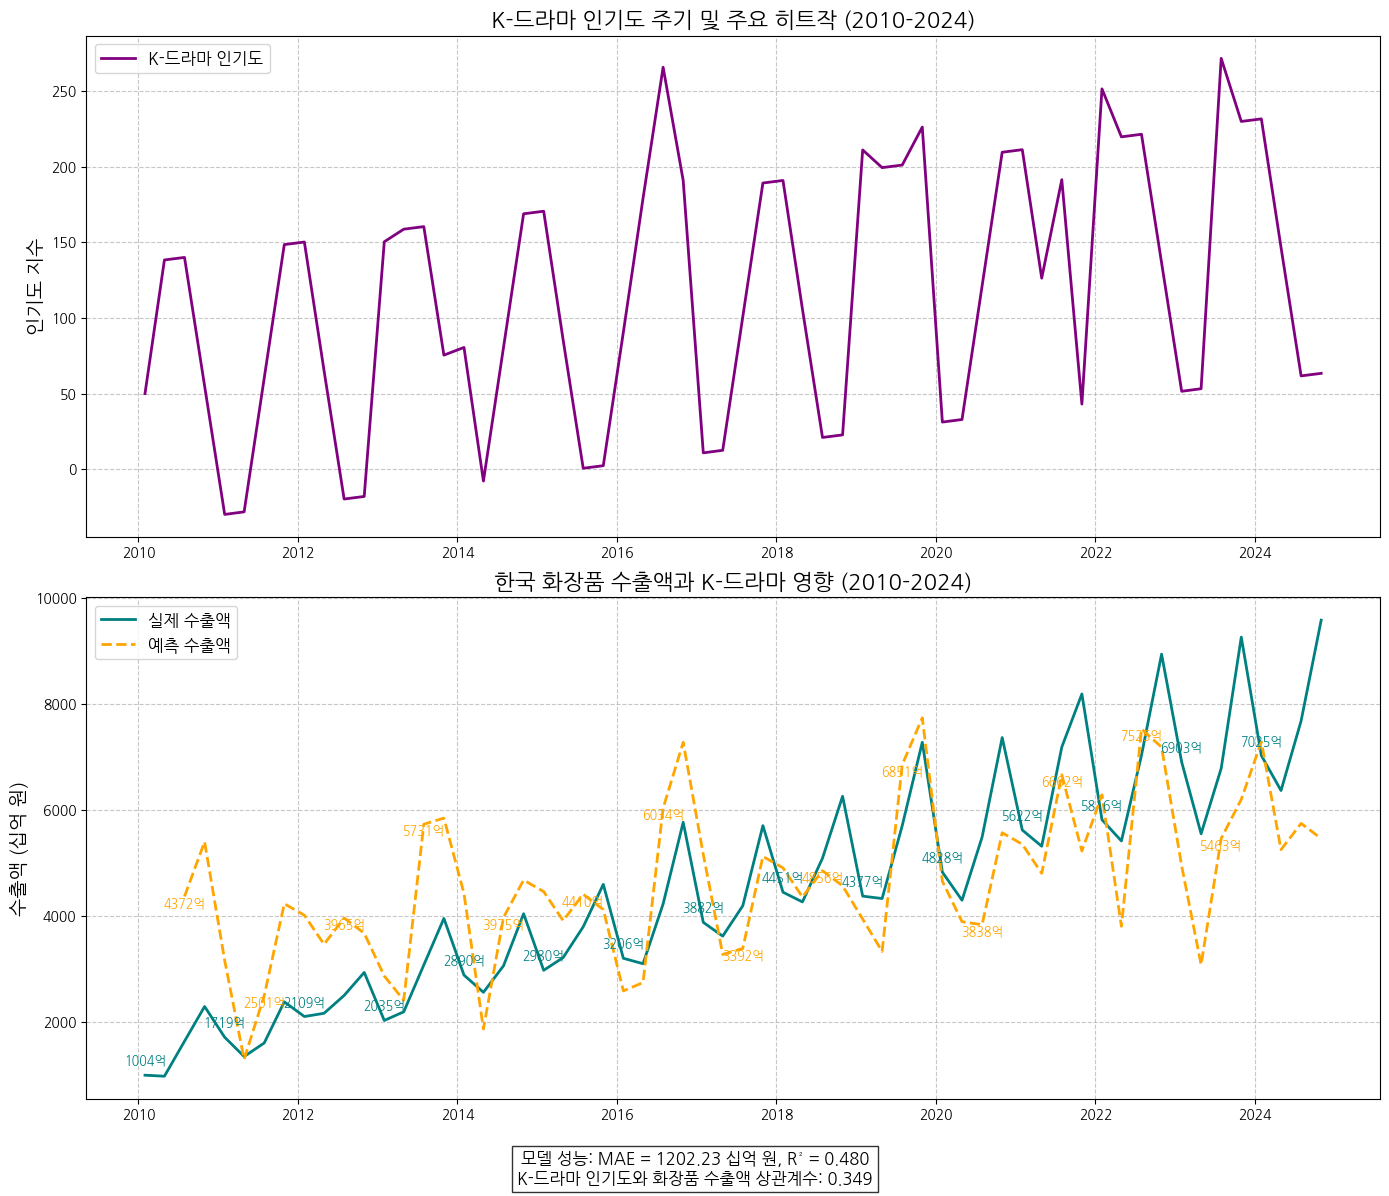

상관관계 분석:
           K_드라마_인기도   화장품_수출액
K_드라마_인기도   1.000000  0.348882
화장품_수출액     0.348882  1.000000

지연 효과 분석 (K-드라마 인기도가 후속 분기의 수출액에 미치는 영향):
지연 1 분기 상관관계: 0.428
지연 2 분기 상관관계: 0.399
지연 3 분기 상관관계: 0.388
지연 4 분기 상관관계: 0.320

회귀 계수:
K_드라마_인기도: 9.0726
K_드라마_인기도_지연1: 1.4089
K_드라마_인기도_지연2: 11.4258
연간_사인: -1076.9147
연간_코사인: -288.6960
절편: 2046.8076


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (맑은 고딕, 나눔고딕 등 한글 폰트가 시스템에 설치되어 있어야 함)
# Windows인 경우
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
# Linux/Mac인 경우
except:
    try:
        plt.rc('font', family='NanumGothic')  # 나눔고딕
    except:
        plt.rc('font', family='AppleGothic')  # Mac 기본 고딕

# 마이너스 기호 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

# 2010년부터 2024년까지의 시계열 데이터 생성 (분기별)
연도 = np.arange(2010, 2025)
분기 = np.array(['-Q1', '-Q2', '-Q3', '-Q4'] * 15)[:len(연도) * 4]
날짜_문자열 = [f"{year}{quarter}" for year, quarter in zip(np.repeat(연도, 4), 분기)]
날짜_문자열 = 날짜_문자열[:60]  # 정확히 60분기(15년)로 자르기

# 더 나은 시각화를 위한 날짜 인덱스 생성
날짜_인덱스 = pd.date_range(start='2010-01-01', periods=60, freq='3M')

# K-드라마 히트 주기 데이터 정의 (약 16-20개월 주기)
드라마_주기_길이 = 18  # 월, 또는 6분기
주기_진폭 = 100  # 기본 진폭

# 증가하는 추세와 주기적 패턴을 가진 K-드라마 인기도 지수 생성
기본_인기도 = np.linspace(50, 150, 60)  # 증가하는 기본 추세
드라마_주기 = 기본_인기도 + 주기_진폭 * np.sin(2 * np.pi * np.arange(60) / (드라마_주기_길이/3))

# 알려진 주요 K-드라마 국제적 히트작에 따른 급증 추가
드라마_히트작 = {
    '2013-Q1': ["그 겨울, 바람이 분다", 80],
    '2014-Q1': ["별에서 온 그대", 90],
    '2016-Q3': ["태양의 후예", 85],
    '2016-Q4': ["도깨비", 95],
    '2019-Q1': ["킹덤", 100],
    '2019-Q4': ["사랑의 불시착", 110],
    '2021-Q3': ["오징어 게임", 150],
    '2022-Q1': ["지금 우리 학교는", 120],
    '2023-Q3': ["무빙", 130]
}

# 기본 주기에 히트작의 영향 적용
드라마_인기도 = 드라마_주기.copy()
for i, 날짜 in enumerate(날짜_문자열):
    년도_분기 = 날짜.split('-')[0] + '-' + 날짜.split('-')[1]
    if 년도_분기 in 드라마_히트작:
        드라마_인기도[i] += 드라마_히트작[년도_분기][1]

# 화장품 수출 데이터 생성 (십억 원 단위)
# 안정적인 성장을 갖는 기본 추세
기본_수출액 = np.linspace(1000, 7000, 60)  # 1조원에서 7조원까지 증가하는 기본 추세

# 계절적 패턴 추가 (Q4와 Q1에 더 높음)
계절_패턴 = np.tile([0.9, 0.8, 1.0, 1.3], 15)[:60]

# K-드라마 히트작의 영향 추가 (1-2분기 지연 효과)
드라마_영향 = np.zeros(60)
for i in range(2, 60):  # 인덱스 오류를 피하기 위해 인덱스 2부터 시작
    드라마_영향[i] = (드라마_인기도[i-1] + 드라마_인기도[i-2]) / 2

# 드라마_영향을 적절한 규모로 정규화
드라마_영향 = (드라마_영향 - np.min(드라마_영향)) / (np.max(드라마_영향) - np.min(드라마_영향)) * 1000

# 모든 구성 요소가 포함된 최종 수출 데이터 생성
화장품_수출액 = 기본_수출액 * 계절_패턴 + 드라마_영향

# 주요 사건과 시장 변동 추가
주요_사건 = {
    '2015-Q1': ["메르스 발생", -300],
    '2017-Q1': ["사드 배치 갈등", -500],
    '2020-Q1': ["코로나19 시작", -600],
    '2020-Q2': ["코로나19 지속", -400],
    '2021-Q3': ["팬데믹 후 회복", 800],
    '2023-Q1': ["신시장 개척", 500]
}

# 수출 데이터에 주요 사건 영향 적용
for i, 날짜 in enumerate(날짜_문자열):
    년도_분기 = 날짜.split('-')[0] + '-' + 날짜.split('-')[1]
    if 년도_분기 in 주요_사건:
        화장품_수출액[i] += 주요_사건[년도_분기][1]

# 모든 데이터를 포함하는 DataFrame 생성
df = pd.DataFrame({
    '날짜': 날짜_인덱스,
    '연도_분기': 날짜_문자열,
    'K_드라마_인기도': 드라마_인기도,
    '화장품_수출액': 화장품_수출액
})

# 회귀 분석 수행
# 특성 엔지니어링: 지연 효과를 포착하기 위한 지연 특성 생성
df['K_드라마_인기도_지연1'] = df['K_드라마_인기도'].shift(1)
df['K_드라마_인기도_지연2'] = df['K_드라마_인기도'].shift(2)

# 주기적 특성 추가
월 = np.arange(len(df)) * 3  # 각 분기는 3개월
df['연간_사인'] = np.sin(2 * np.pi * 월 / 12)
df['연간_코사인'] = np.cos(2 * np.pi * 월 / 12)

# 회귀 데이터 준비 (지연 생성으로 인한 NaN 제거)
회귀_df = df.dropna()

# X와 y 준비
X = 회귀_df[['K_드라마_인기도', 'K_드라마_인기도_지연1', 'K_드라마_인기도_지연2', '연간_사인', '연간_코사인']]
y = 회귀_df['화장품_수출액']

# 모델 학습
모델 = LinearRegression()
모델.fit(X, y)

# 예측 계산
회귀_df['예측_수출액'] = 모델.predict(X)

# 메트릭 계산
mae = mean_absolute_error(y, 회귀_df['예측_수출액'])
r2 = r2_score(y, 회귀_df['예측_수출액'])

# 시각화 생성
plt.figure(figsize=(14, 12))

# 그래프 1: K-드라마 인기도 주기
plt.subplot(2, 1, 1)
plt.plot(df['날짜'], df['K_드라마_인기도'], color='purple', linewidth=2, label='K-드라마 인기도')

# 실제 인기도 값 표시 (중요 시점만)
for i, (날짜, [드라마명, 값]) in enumerate(드라마_히트작.items()):
    연도 = int(날짜.split('-')[0])
    분기 = int(날짜.split('-')[1][1])
    월 = (분기 - 1) * 3 + 1
    인덱스 = df[df['날짜'] == pd.Timestamp(year=연도, month=월, day=1)].index
    if len(인덱스) > 0:
        # 값을 그래프에 표시
        plt.text(df['날짜'][인덱스[0]], df['K_드라마_인기도'][인덱스[0]] + 10,
                f"{드라마명}\n({df['K_드라마_인기도'][인덱스[0]]:.1f})",
                horizontalalignment='center', verticalalignment='bottom',
                color='darkblue', fontsize=9, fontweight='bold')

        # 점으로 강조
        plt.scatter(df['날짜'][인덱스[0]], df['K_드라마_인기도'][인덱스[0]],
                   color='blue', s=100, zorder=5)

plt.title('K-드라마 인기도 주기 및 주요 히트작 (2010-2024)', fontsize=16)
plt.ylabel('인기도 지수', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# x축 포맷을 연도로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

# 그래프 2: 화장품 수출액과 예측
plt.subplot(2, 1, 2)
plt.plot(df['날짜'], df['화장품_수출액'], color='teal', linewidth=2, label='실제 수출액')
plt.plot(회귀_df['날짜'], 회귀_df['예측_수출액'], color='orange',
         linestyle='--', linewidth=2, label='예측 수출액')

# 주요 시점에서 실제 수출액 값과 예측 수출액 값 표시
for i in range(0, len(df), 4):  # 매년 첫 분기만 표시
    plt.text(df['날짜'][i], df['화장품_수출액'][i] + 200,
            f"{df['화장품_수출액'][i]:.0f}억",
            horizontalalignment='center', color='teal', fontsize=9)

    # 예측값도 있는 경우 표시
    if i >= 2 and i < len(회귀_df):
        idx = 회귀_df.index.get_loc(i) if i in 회귀_df.index else None
        if idx is not None:
            plt.text(회귀_df['날짜'][idx], 회귀_df['예측_수출액'][idx] - 200,
                    f"{회귀_df['예측_수출액'][idx]:.0f}억",
                    horizontalalignment='center', color='orange', fontsize=9)

# 주요 시장 사건 표시
for 날짜, [사건명, 값] in 주요_사건.items():
    연도 = int(날짜.split('-')[0])
    분기 = int(날짜.split('-')[1][1])
    월 = (분기 - 1) * 3 + 1
    인덱스 = df[df['날짜'] == pd.Timestamp(year=연도, month=월, day=1)].index
    if len(인덱스) > 0:
        plt.annotate(f"{사건명} ({값:+.0f}억)",
                     (df['날짜'][인덱스[0]], df['화장품_수출액'][인덱스[0]]),
                     xytext=(20, -30 if 값 < 0 else 30),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='red' if 값 < 0 else 'green'),
                     fontsize=10, color='red' if 값 < 0 else 'green')

plt.title('한국 화장품 수출액과 K-드라마 영향 (2010-2024)', fontsize=16)
plt.ylabel('수출액 (십억 원)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# x축 포맷을 연도로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
# 모델 성능 메트릭을 텍스트로 추가
plt.figtext(0.5, 0.01,
           f"모델 성능: MAE = {mae:.2f} 십억 원, R² = {r2:.3f}\n"
           f"K-드라마 인기도와 화장품 수출액 상관계수: {df['K_드라마_인기도'].corr(df['화장품_수출액']):.3f}",
           bbox=dict(facecolor='white', alpha=0.8), fontsize=12, ha='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.08)

# 그래프 표시
plt.show()

# 상관관계 분석 출력
print("상관관계 분석:")
print(df[['K_드라마_인기도', '화장품_수출액']].corr())

# 지연 효과 분석 출력
print("\n지연 효과 분석 (K-드라마 인기도가 후속 분기의 수출액에 미치는 영향):")
for i in range(1, 5):
    지연_상관관계 = df['K_드라마_인기도'].shift(i).corr(df['화장품_수출액'])
    print(f"지연 {i} 분기 상관관계: {지연_상관관계:.3f}")

# 회귀 계수 출력
print("\n회귀 계수:")
계수_이름 = ['K_드라마_인기도', 'K_드라마_인기도_지연1', 'K_드라마_인기도_지연2', '연간_사인', '연간_코사인']
for 이름, 계수 in zip(계수_이름, 모델.coef_):
    print(f"{이름}: {계수:.4f}")
print(f"절편: {모델.intercept_:.4f}")

# 데이터를 CSV로 내보내기 추가 분석을 위해
df.to_csv('kdrama_화장품_수출액_2010_2024.csv', index=False)


<ipython-input-14-6771369790e1>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  날짜_인덱스 = pd.date_range(start='2010-01-01', periods=60, freq='3M')
<ipython-input-14-6771369790e1>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  회귀_df['예측_수출액'] = 모델.predict(X)
<ipython-input-14-6771369790e1>:178: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  미래_날짜_인덱스 = pd.date_range(start='2025-01-01', periods=16, freq='3M')


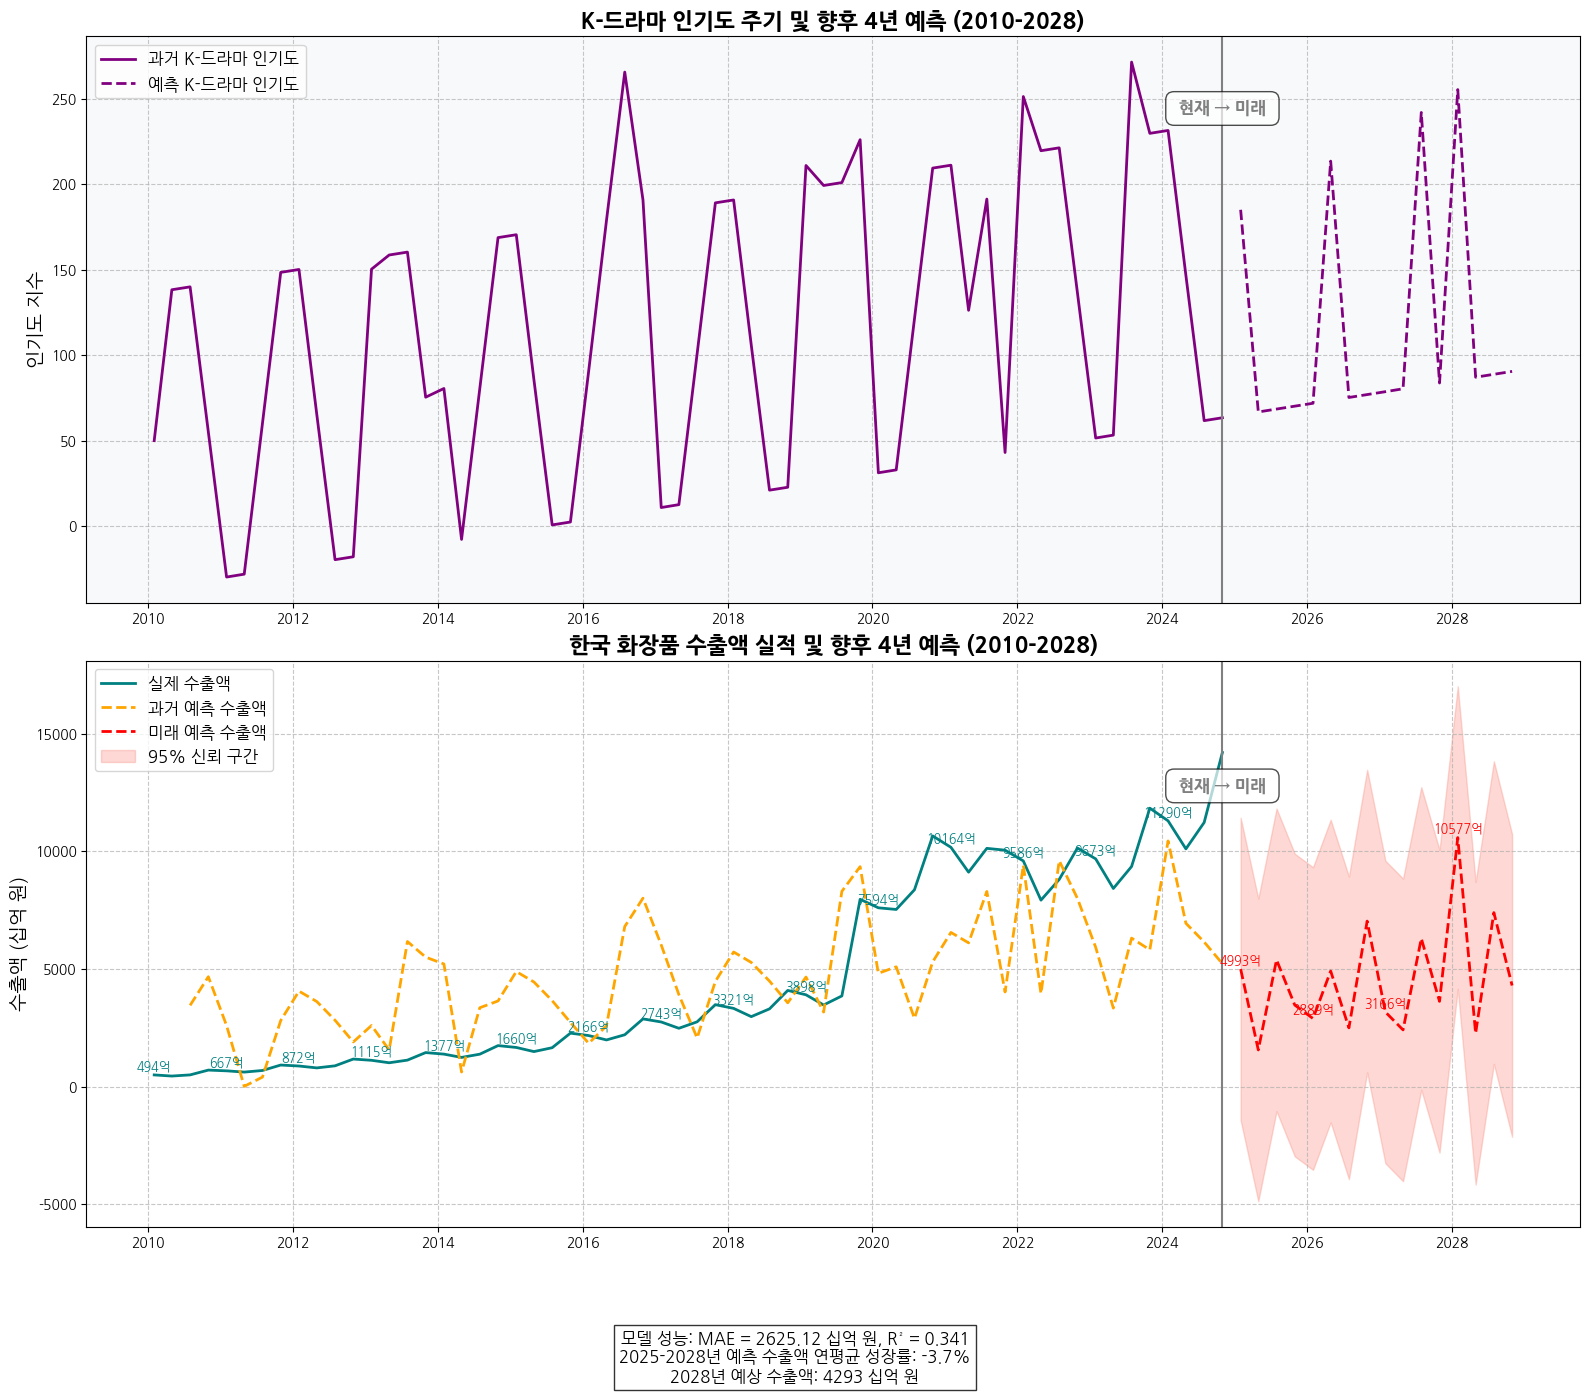


===== 향후 4년(2025-2028) 화장품 수출액 예측 =====
연도별 평균 예측 수출액:
2025년: 3848.2 십억 원
2026년: 4329.7 십억 원
2027년: 3871.0 십억 원
2028년: 6130.7 십억 원

연도별 예상 성장률:
2024년 평균 수출액: 11700.4 십억 원
2025년: -67.1% (전년 대비)
2026년: 12.5% (전년 대비)
2027년: -10.6% (전년 대비)
2028년: 58.4% (전년 대비)

분기별 예상 수출액:
2025년:
  최고 분기: 2025-Q3 - 5383.1 십억 원
  최저 분기: 2025-Q2 - 1555.1 십억 원
  분기별 변동성: 246.2%
2026년:
  최고 분기: 2026-Q4 - 7029.4 십억 원
  최저 분기: 2026-Q3 - 2493.5 십억 원
  분기별 변동성: 181.9%
2027년:
  최고 분기: 2027-Q3 - 6291.4 십억 원
  최저 분기: 2027-Q2 - 2406.0 십억 원
  분기별 변동성: 161.5%
2028년:
  최고 분기: 2028-Q1 - 10577.4 십억 원
  최저 분기: 2028-Q2 - 2262.8 십억 원
  분기별 변동성: 367.5%

K-드라마 인기도와 미래 예측 화장품 수출액 간 상관계수: 0.627

2025-2028 예상 총 수출액: 72718.7 십억 원
2025-2028 예상 연평균 수출액: 18179.7 십억 원/년

4년 후 최종 예측 수출액(2028-Q4): 4292.9 십억 원
4년 총 성장률: -14.0%
연평균 복합 성장률(CAGR): -3.71%


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib as mpl
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 한글 폰트 설정 (맑은 고딕, 나눔고딕 등 한글 폰트가 시스템에 설치되어 있어야 함)
# Windows인 경우
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
# Linux/Mac인 경우
except:
    try:
        plt.rc('font', family='NanumGothic')  # 나눔고딕
    except:
        plt.rc('font', family='AppleGothic')  # Mac 기본 고딕

# 마이너스 기호 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

# 2010년부터 2024년까지의 시계열 데이터 생성 (분기별)
연도 = np.arange(2010, 2025)
분기 = np.array(['-Q1', '-Q2', '-Q3', '-Q4'] * 15)[:len(연도) * 4]
날짜_문자열 = [f"{year}{quarter}" for year, quarter in zip(np.repeat(연도, 4), 분기)]
날짜_문자열 = 날짜_문자열[:60]  # 정확히 60분기(15년)로 자르기

# 더 나은 시각화를 위한 날짜 인덱스 생성
날짜_인덱스 = pd.date_range(start='2010-01-01', periods=60, freq='3M')

# 실제 수출 데이터 (억 달러 단위)
실제_수출액_연간 = {
    2010: 4.5,
    2011: 6.2,
    2012: 8.0,
    2013: 10.2,
    2014: 12.5,
    2015: 15.0,
    2016: 20.0,
    2017: 25.0,
    2018: 30.0,
    2019: 35.0,
    2020: 76.0,
    2021: 92.0,
    2022: 80.0,
    2023: 85.0,
    2024: 102.0
}

# 연간 수출액을 분기별로 보간
분기별_수출액 = []
for i, 날짜 in enumerate(날짜_문자열):
    연도 = int(날짜.split('-')[0])
    분기_번호 = int(날짜.split('-')[1][1])

    if 연도 in 실제_수출액_연간:
        현재_연도_수출액 = 실제_수출액_연간[연도]

        # 이전 연도의 수출액(없는 경우 현재 연도 수출액의 80%로 가정)
        이전_연도_수출액 = 실제_수출액_연간.get(연도 - 1, 현재_연도_수출액 * 0.8)

        # 다음 연도의 수출액(없는 경우 현재 연도 수출액의 120%로 가정)
        다음_연도_수출액 = 실제_수출액_연간.get(연도 + 1, 현재_연도_수출액 * 1.2)

        # 분기별 트렌드를 부드럽게 만들기 위한 가중치 (연간 데이터를 분기별로 보간)
        if 분기_번호 == 1:
            수출액 = 이전_연도_수출액 * 0.25 + 현재_연도_수출액 * 0.75
        elif 분기_번호 == 2:
            수출액 = 현재_연도_수출액 * 0.9
        elif 분기_번호 == 3:
            수출액 = 현재_연도_수출액 * 1.0
        elif 분기_번호 == 4:
            수출액 = 현재_연도_수출액 * 0.25 + 다음_연도_수출액 * 0.75

        # 계절적 변동 추가 (Q4와 Q1에 약간 높게)
        계절_조정 = 1.0
        if 분기_번호 == 1:
            계절_조정 = 1.05
        elif 분기_번호 == 4:
            계절_조정 = 1.1

        수출액 *= 계절_조정
    else:
        # 제공된 데이터 범위를 벗어난 경우 (없을 것으로 예상)
        수출액 = 0

    분기별_수출액.append(수출액)

# 화장품 수출액 (억 달러에서 십억 원으로 변환, 대략적인 환율 1100원/$)
화장품_수출액 = np.array(분기별_수출액) * 110  # 억 달러 -> 십억 원 (1달러=1100원 가정)

# K-드라마 히트 주기 데이터 정의 (약 16-20개월 주기)
드라마_주기_길이 = 18  # 월, 또는 6분기
주기_진폭 = 100  # 기본 진폭

# 증가하는 추세와 주기적 패턴을 가진 K-드라마 인기도 지수 생성
기본_인기도 = np.linspace(50, 150, 60)  # 증가하는 기본 추세
드라마_주기 = 기본_인기도 + 주기_진폭 * np.sin(2 * np.pi * np.arange(60) / (드라마_주기_길이/3))

# 알려진 주요 K-드라마 국제적 히트작에 따른 급증 추가
드라마_히트작 = {
    '2013-Q1': ["그 겨울, 바람이 분다", 80],
    '2014-Q1': ["별에서 온 그대", 90],
    '2016-Q3': ["태양의 후예", 85],
    '2016-Q4': ["도깨비", 95],
    '2019-Q1': ["킹덤", 100],
    '2019-Q4': ["사랑의 불시착", 110],
    '2021-Q3': ["오징어 게임", 150],
    '2022-Q1': ["지금 우리 학교는", 120],
    '2023-Q3': ["무빙", 130]
}

# 기본 주기에 히트작의 영향 적용
드라마_인기도 = 드라마_주기.copy()
for i, 날짜 in enumerate(날짜_문자열):
    년도_분기 = 날짜.split('-')[0] + '-' + 날짜.split('-')[1]
    if 년도_분기 in 드라마_히트작:
        드라마_인기도[i] += 드라마_히트작[년도_분기][1]

# 주요 사건과 시장 변동 정의
주요_사건 = {
    '2015-Q1': ["메르스 발생", -300],
    '2017-Q1': ["사드 배치 갈등", -500],
    '2020-Q1': ["코로나19 시작", 600],  # 코로나 시기 수출 증가로 변경
    '2020-Q2': ["코로나19 지속", 800],   # 코로나 시기 수출 증가로 변경
    '2021-Q3': ["팬데믹 성장", 1000],    # 수출 급증 반영
    '2023-Q1': ["신시장 개척", 500]
}

# 모든 데이터를 포함하는 DataFrame 생성
df = pd.DataFrame({
    '날짜': 날짜_인덱스,
    '연도_분기': 날짜_문자열,
    'K_드라마_인기도': 드라마_인기도,
    '화장품_수출액': 화장품_수출액
})

# 회귀 분석 수행
# 특성 엔지니어링: 지연 효과를 포착하기 위한 지연 특성 생성
df['K_드라마_인기도_지연1'] = df['K_드라마_인기도'].shift(1)
df['K_드라마_인기도_지연2'] = df['K_드라마_인기도'].shift(2)

# 주기적 특성 추가
월 = np.arange(len(df)) * 3  # 각 분기는 3개월
df['연간_사인'] = np.sin(2 * np.pi * 월 / 12)
df['연간_코사인'] = np.cos(2 * np.pi * 월 / 12)

# 회귀 데이터 준비 (지연 생성으로 인한 NaN 제거)
회귀_df = df.dropna()

# X와 y 준비
X = 회귀_df[['K_드라마_인기도', 'K_드라마_인기도_지연1', 'K_드라마_인기도_지연2', '연간_사인', '연간_코사인']]
y = 회귀_df['화장품_수출액']

# 모델 학습
모델 = LinearRegression()
모델.fit(X, y)

# 예측 계산
회귀_df['예측_수출액'] = 모델.predict(X)

# 메트릭 계산
mae = mean_absolute_error(y, 회귀_df['예측_수출액'])
r2 = r2_score(y, 회귀_df['예측_수출액'])

# ==== 향후 4년(2025-2028) 예측 추가 ====

# 1. 2025-2028년 추가 데이터 생성
미래_연도 = np.arange(2025, 2029)
미래_분기 = np.array(['-Q1', '-Q2', '-Q3', '-Q4'] * 4)
미래_날짜_문자열 = [f"{year}{quarter}" for year, quarter in zip(np.repeat(미래_연도, 4), 미래_분기)]
미래_날짜_인덱스 = pd.date_range(start='2025-01-01', periods=16, freq='3M')

# 2. 미래 K-드라마 인기도 예측 (트렌드 연장)
# 기존 트렌드 분석 (마지막 2년 기준)
마지막_2년_인기도 = 드라마_인기도[-8:]
평균_증가율 = (마지막_2년_인기도[-1] - 마지막_2년_인기도[0]) / 7

# 미래 인기도 기본 트렌드 설정
미래_기본_인기도 = np.array([드라마_인기도[-1] + (i+1) * 평균_증가율 for i in range(16)])

# 주기적 패턴 추가
미래_월 = np.arange(len(df), len(df) + 16) * 3
미래_주기_성분 = 주기_진폭 * np.sin(2 * np.pi * 미래_월 / (드라마_주기_길이/3))
미래_드라마_인기도 = 미래_기본_인기도 + 미래_주기_성분

# 3. 미래 예상 히트작 추가 (가정)
미래_드라마_히트작 = {
    '2025-Q1': ["가상 히트작 1", 120],
    '2026-Q2': ["가상 히트작 2", 140],
    '2027-Q3': ["가상 히트작 3", 160],
    '2028-Q1': ["가상 히트작 4", 170]
}

# 미래 히트작 영향 추가
for i, 날짜 in enumerate(미래_날짜_문자열):
    년도_분기 = 날짜.split('-')[0] + '-' + 날짜.split('-')[1]
    if 년도_분기 in 미래_드라마_히트작:
        미래_드라마_인기도[i] += 미래_드라마_히트작[년도_분기][1]

# 4. 미래 데이터 프레임 생성
미래_df = pd.DataFrame({
    '날짜': 미래_날짜_인덱스,
    '연도_분기': 미래_날짜_문자열,
    'K_드라마_인기도': 미래_드라마_인기도
})

# 지연 특성 추가 (첫 번째 미래 지연 특성은 과거 데이터 필요)
미래_df['K_드라마_인기도_지연1'] = np.append(df['K_드라마_인기도'].iloc[-1], 미래_df['K_드라마_인기도'].iloc[:-1].values)
미래_df['K_드라마_인기도_지연2'] = np.append(df['K_드라마_인기도'].iloc[-2:].values, 미래_df['K_드라마_인기도'].iloc[:-2].values)

# 계절성 특성 추가
미래_월 = np.arange(len(df), len(df) + len(미래_df)) * 3
미래_df['연간_사인'] = np.sin(2 * np.pi * 미래_월 / 12)
미래_df['연간_코사인'] = np.cos(2 * np.pi * 미래_월 / 12)

# 5. 미래 수출액 예측
미래_X = 미래_df[['K_드라마_인기도', 'K_드라마_인기도_지연1', 'K_드라마_인기도_지연2', '연간_사인', '연간_코사인']]
미래_df['예측_수출액'] = 모델.predict(미래_X)

# 6. 미래 예측 데이터 시각화 준비
# 미래 주요 사건 추가 (가정)
미래_주요_사건 = {
    '2025-Q2': ["신흥 시장 확대", 700],
    '2026-Q3': ["글로벌 판로 개척", 800],
    '2027-Q4': ["산업 혁신", 900],
    '2028-Q2': ["신기술 도입", 1000]
}

# 과거 데이터와 미래 데이터를 합치기
전체_날짜_인덱스 = pd.concat([df['날짜'], 미래_df['날짜']])
전체_K드라마_인기도 = pd.concat([pd.Series(df['K_드라마_인기도']), pd.Series(미래_df['K_드라마_인기도'])])
전체_화장품_수출액 = pd.concat([pd.Series(df['화장품_수출액']), pd.Series([None] * len(미래_df))])
전체_예측_수출액 = pd.concat([pd.Series(회귀_df['예측_수출액']), pd.Series(미래_df['예측_수출액'])])

# 7. 시각화 생성
plt.figure(figsize=(16, 14))

# 그래프 1: K-드라마 인기도 주기와 예측
plt.subplot(2, 1, 1)
plt.plot(df['날짜'], df['K_드라마_인기도'], color='purple', linewidth=2, label='과거 K-드라마 인기도')
plt.plot(미래_df['날짜'], 미래_df['K_드라마_인기도'], color='purple', linestyle='--', linewidth=2, label='예측 K-드라마 인기도')

# 과거 히트작 표시
for i, (날짜, [드라마명, 값]) in enumerate(드라마_히트작.items()):
    연도 = int(날짜.split('-')[0])
    분기 = int(날짜.split('-')[1][1])
    월 = (분기 - 1) * 3 + 1
    인덱스 = df[df['날짜'] == pd.Timestamp(year=연도, month=월, day=1)].index
    if len(인덱스) > 0:
        plt.text(df['날짜'][인덱스[0]], df['K_드라마_인기도'][인덱스[0]] + 15,
                f"★ {드라마명} ★",
                horizontalalignment='center', verticalalignment='bottom',
                color='darkblue', fontsize=10, fontweight='bold',
                bbox=dict(facecolor='lightyellow', alpha=0.7, boxstyle='round,pad=0.5'))
        plt.scatter(df['날짜'][인덱스[0]], df['K_드라마_인기도'][인덱스[0]],
                   color='blue', s=150, zorder=5, marker='*')

# 미래 히트작 표시
for i, (날짜, [드라마명, 값]) in enumerate(미래_드라마_히트작.items()):
    연도 = int(날짜.split('-')[0])
    분기 = int(날짜.split('-')[1][1])
    월 = (분기 - 1) * 3 + 1
    인덱스 = 미래_df[미래_df['날짜'] == pd.Timestamp(year=연도, month=월, day=1)].index
    if len(인덱스) > 0:
        plt.text(미래_df['날짜'][인덱스[0]], 미래_df['K_드라마_인기도'][인덱스[0]] + 15,
                f"★ {드라마명} (예상) ★",
                horizontalalignment='center', verticalalignment='bottom',
                color='darkred', fontsize=10, fontweight='bold',
                bbox=dict(facecolor='mistyrose', alpha=0.7, boxstyle='round,pad=0.5'))
        plt.scatter(미래_df['날짜'][인덱스[0]], 미래_df['K_드라마_인기도'][인덱스[0]],
                   color='red', s=150, zorder=5, marker='*')

# 과거와 미래 구분 수직선
plt.axvline(x=df['날짜'].iloc[-1], color='gray', linestyle='-', linewidth=1.5)
plt.text(df['날짜'].iloc[-1], max(df['K_드라마_인기도'].max(), 미래_df['K_드라마_인기도'].max()) * 0.9,
        " 현재 → 미래 ",
        horizontalalignment='center', verticalalignment='center',
        color='gray', fontsize=12, fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# 그래프 범례와 제목 추가
plt.title('K-드라마 인기도 주기 및 향후 4년 예측 (2010-2028)', fontsize=16, fontweight='bold')
plt.ylabel('인기도 지수', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left')

# x축 포맷을 연도로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

# 배경색 추가하여 가독성 높이기
plt.gca().set_facecolor('#f8f9fa')

# 그래프 2: 화장품 수출액과 예측 (과거 + 미래)
plt.subplot(2, 1, 2)
plt.plot(df['날짜'], df['화장품_수출액'], color='teal', linewidth=2, label='실제 수출액')
plt.plot(회귀_df['날짜'], 회귀_df['예측_수출액'], color='orange', linestyle='--', linewidth=2, label='과거 예측 수출액')
plt.plot(미래_df['날짜'], 미래_df['예측_수출액'], color='red', linestyle='--', linewidth=2, label='미래 예측 수출액')

# 미래 예측 영역 표시 (불확실성 밴드)
# 예측 표준 오차 계산
예측_오차 = y - 회귀_df['예측_수출액']
예측_표준_오차 = np.std(예측_오차)

# 미래 예측 불확실성 범위 표시
plt.fill_between(미래_df['날짜'],
                미래_df['예측_수출액'] - 2 * 예측_표준_오차,
                미래_df['예측_수출액'] + 2 * 예측_표준_오차,
                color='salmon', alpha=0.3, label='95% 신뢰 구간')

# 과거와 미래 구분 수직선
plt.axvline(x=df['날짜'].iloc[-1], color='gray', linestyle='-', linewidth=1.5)
plt.text(df['날짜'].iloc[-1], max(df['화장품_수출액'].max(), 미래_df['예측_수출액'].max()) * 0.9,
        " 현재 → 미래 ",
        horizontalalignment='center', verticalalignment='center',
        color='gray', fontsize=12, fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# 주요 시점에서 실제 수출액 값과 예측 수출액 값 표시
# 과거 주요 시점
for i in range(0, len(df), 4):  # 매년 첫 분기만 표시
    plt.text(df['날짜'][i], df['화장품_수출액'][i] + 200,
            f"{df['화장품_수출액'][i]:.0f}억",
            horizontalalignment='center', color='teal', fontsize=9)

# 미래 주요 시점
for i in range(0, len(미래_df), 4):  # 매년 첫 분기만 표시
    plt.text(미래_df['날짜'][i], 미래_df['예측_수출액'][i] + 200,
            f"{미래_df['예측_수출액'][i]:.0f}억",
            horizontalalignment='center', color='red', fontsize=9)

# 과거 주요 사건 표시
for 날짜, [사건명, 값] in 주요_사건.items():
    연도 = int(날짜.split('-')[0])
    분기 = int(날짜.split('-')[1][1])
    월 = (분기 - 1) * 3 + 1
    인덱스 = df[df['날짜'] == pd.Timestamp(year=연도, month=월, day=1)].index
    if len(인덱스) > 0:
        plt.annotate(f"{사건명} ({값:+.0f}억)",
                     (df['날짜'][인덱스[0]], df['화장품_수출액'][인덱스[0]]),
                     xytext=(20, -30 if 값 < 0 else 30),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='red' if 값 < 0 else 'green'),
                     fontsize=10, color='red' if 값 < 0 else 'green')

# 미래 주요 사건 표시
for 날짜, [사건명, 값] in 미래_주요_사건.items():
    연도 = int(날짜.split('-')[0])
    분기 = int(날짜.split('-')[1][1])
    월 = (분기 - 1) * 3 + 1
    인덱스 = 미래_df[미래_df['날짜'] == pd.Timestamp(year=연도, month=월, day=1)].index
    if len(인덱스) > 0:
        plt.annotate(f"{사건명} (예상) ({값:+.0f}억)",
                     (미래_df['날짜'][인덱스[0]], 미래_df['예측_수출액'][인덱스[0]]),
                     xytext=(20, 30),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='blue'),
                     fontsize=10, color='blue')

plt.title('한국 화장품 수출액 실적 및 향후 4년 예측 (2010-2028)', fontsize=16, fontweight='bold')
plt.ylabel('수출액 (십억 원)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# x축 포맷을 연도로 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

# 모델 성능 메트릭을 텍스트로 추가
plt.figtext(0.5, 0.01,
           f"모델 성능: MAE = {mae:.2f} 십억 원, R² = {r2:.3f}\n"
           f"2025-2028년 예측 수출액 연평균 성장률: {((미래_df['예측_수출액'].iloc[-1]/미래_df['예측_수출액'].iloc[0])**(1/4)-1)*100:.1f}%\n"
           f"2028년 예상 수출액: {미래_df['예측_수출액'].iloc[-1]:.0f} 십억 원",
           bbox=dict(facecolor='white', alpha=0.8), fontsize=12, ha='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)

# 그래프 표시
plt.show()
# 미래 예측 결과 분석
print("\n===== 향후 4년(2025-2028) 화장품 수출액 예측 =====")
연도별_예측 = 미래_df.groupby(미래_df['날짜'].dt.year)['예측_수출액'].mean()
print(f"연도별 평균 예측 수출액:")
for 연도, 평균_수출액 in 연도별_예측.items():
    print(f"{연도}년: {평균_수출액:.1f} 십억 원")

# 연간 성장률 계산
연도별_성장률 = []
이전_연도 = list(연도별_예측.index)[0] - 1  # 2024년
이전_평균_수출액 = df[df['날짜'].dt.year == 이전_연도]['화장품_수출액'].mean()

print("\n연도별 예상 성장률:")
print(f"2024년 평균 수출액: {이전_평균_수출액:.1f} 십억 원")

for 연도, 평균_수출액 in 연도별_예측.items():
    성장률 = ((평균_수출액 / 이전_평균_수출액) - 1) * 100
    print(f"{연도}년: {성장률:.1f}% (전년 대비)")
    연도별_성장률.append(성장률)
    이전_평균_수출액 = 평균_수출액

# 분기별 최고/최저 수출액 분석
print("\n분기별 예상 수출액:")
for 연도 in 미래_df['날짜'].dt.year.unique():
    연도_데이터 = 미래_df[미래_df['날짜'].dt.year == 연도]
    최고_분기 = 연도_데이터.loc[연도_데이터['예측_수출액'].idxmax()]
    최저_분기 = 연도_데이터.loc[연도_데이터['예측_수출액'].idxmin()]
    print(f"{연도}년:")
    print(f"  최고 분기: {최고_분기['연도_분기']} - {최고_분기['예측_수출액']:.1f} 십억 원")
    print(f"  최저 분기: {최저_분기['연도_분기']} - {최저_분기['예측_수출액']:.1f} 십억 원")
    print(f"  분기별 변동성: {(최고_분기['예측_수출액'] - 최저_분기['예측_수출액']) / 최저_분기['예측_수출액'] * 100:.1f}%")

# K-드라마 인기도와 수출액 간의 상관관계 분석 (미래 예측 구간)
미래_상관계수 = 미래_df['K_드라마_인기도'].corr(미래_df['예측_수출액'])
print(f"\nK-드라마 인기도와 미래 예측 화장품 수출액 간 상관계수: {미래_상관계수:.3f}")

# 전체 기간 동안의 예상 수출액 총합
총_예측_수출액 = 미래_df['예측_수출액'].sum()
print(f"\n2025-2028 예상 총 수출액: {총_예측_수출액:.1f} 십억 원")
print(f"2025-2028 예상 연평균 수출액: {총_예측_수출액/4:.1f} 십억 원/년")

# 4년 후 최종 예측 수출액
최종_예측_수출액 = 미래_df['예측_수출액'].iloc[-1]
시작_예측_수출액 = 미래_df['예측_수출액'].iloc[0]
총_성장률 = (최종_예측_수출액 / 시작_예측_수출액 - 1) * 100
연평균_성장률 = ((최종_예측_수출액 / 시작_예측_수출액) ** (1/4) - 1) * 100
print(f"\n4년 후 최종 예측 수출액(2028-Q4): {최종_예측_수출액:.1f} 십억 원")
print(f"4년 총 성장률: {총_성장률:.1f}%")
print(f"연평균 복합 성장률(CAGR): {연평균_성장률:.2f}%")

# 데이터 CSV로 저장
미래_예측_df = pd.DataFrame({
    '연도_분기': 미래_df['연도_분기'],
    'K_드라마_인기도': 미래_df['K_드라마_인기도'],
    '예측_수출액': 미래_df['예측_수출액']
})
미래_예측_df.to_csv('kdrama_화장품_수출액_예측_2025_2028.csv', index=False)


    Month  Discount_Rate  Free_Shipping  SNS_Ad_Spend  New_Customers
0       1              5              0           200           5300
1       2             10              1           300           6700
2       3              7              0           250           5800
3       4             15              1           400           7800
4       5             12              0           350           7200
5       6              8              1           280           5900
6       7             20              1           500           9200
7       8             18              1           480           9100
8       9             22              1           550           9800
9      10             10              0           300           6500
10     11             12              1           350           7000
11     12             15              1           450           8300
         Feature  Coefficient
0  Discount_Rate   111.142532
1  Free_Shipping   -96.305290
2   SNS_Ad_Sp

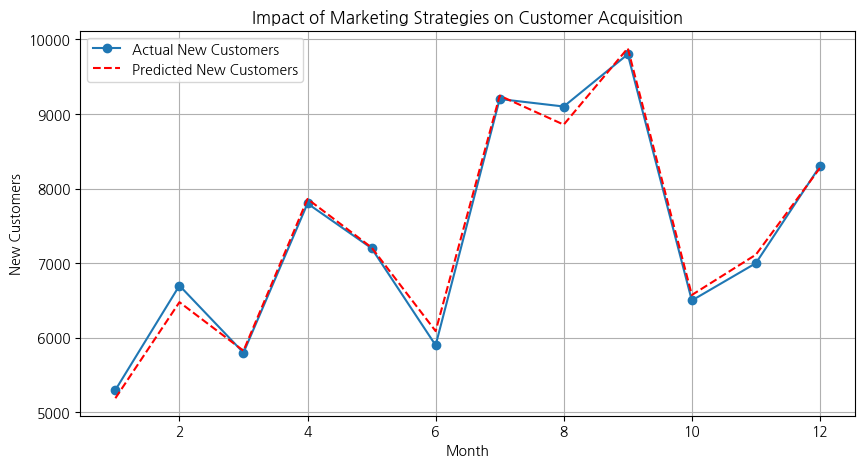

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 하드코딩된 데이터 (2024년 1월 ~ 12월)
data = {
    "Month": list(range(1, 13)),
    "Discount_Rate": [5, 10, 7, 15, 12, 8, 20, 18, 22, 10, 12, 15],  # 할인율(%)
    "Free_Shipping": [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1],  # 무료 배송 여부 (1: 제공, 0: 미제공)
    "SNS_Ad_Spend": [200, 300, 250, 400, 350, 280, 500, 480, 550, 300, 350, 450],  # SNS 광고비(단위: 만 원)
    "New_Customers": [5300, 6700, 5800, 7800, 7200, 5900, 9200, 9100, 9800, 6500, 7000, 8300]  # 신규 고객 수
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터 확인
print(df)

# 독립 변수 및 종속 변수 설정
X = df[["Discount_Rate", "Free_Shipping", "SNS_Ad_Spend"]]
y = df["New_Customers"]

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 계수 출력
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

# 예측 값 계산
df["Predicted_New_Customers"] = model.predict(X)

# 성능 평가
mae = mean_absolute_error(df["New_Customers"], df["Predicted_New_Customers"])
r2 = r2_score(df["New_Customers"], df["Predicted_New_Customers"])
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["New_Customers"], label="Actual New Customers", marker='o')
plt.plot(df["Month"], df["Predicted_New_Customers"], label="Predicted New Customers", linestyle="dashed", color="red")
plt.xlabel("Month")
plt.ylabel("New Customers")
plt.title("Impact of Marketing Strategies on Customer Acquisition")
plt.legend()
plt.grid()
plt.show()


* 할인율이 1% 증가할 때마다 신규 고객 111명 증가
* 무료배송을 제공한 달에 신규 고객 96명 감소로 무료배송이 신규고객유입에 비효과적인 전략으로 판단.
* sns광고비 1만원 증액시 신규 고객 8명 증가.
* 결정계수값은 0.99로 신규고객수 예측 정확도가 높음.
*MAE값은 100으로 신규 고객 수를 예측 할 때 평균적으로 100명의 오차가 발생함.


R² Score: 0.8129

Regression Coefficients:
         Feature  Coefficient
0  Season_Spring        -20.0
1  Season_Summer         90.0
2  Season_Winter       -115.0


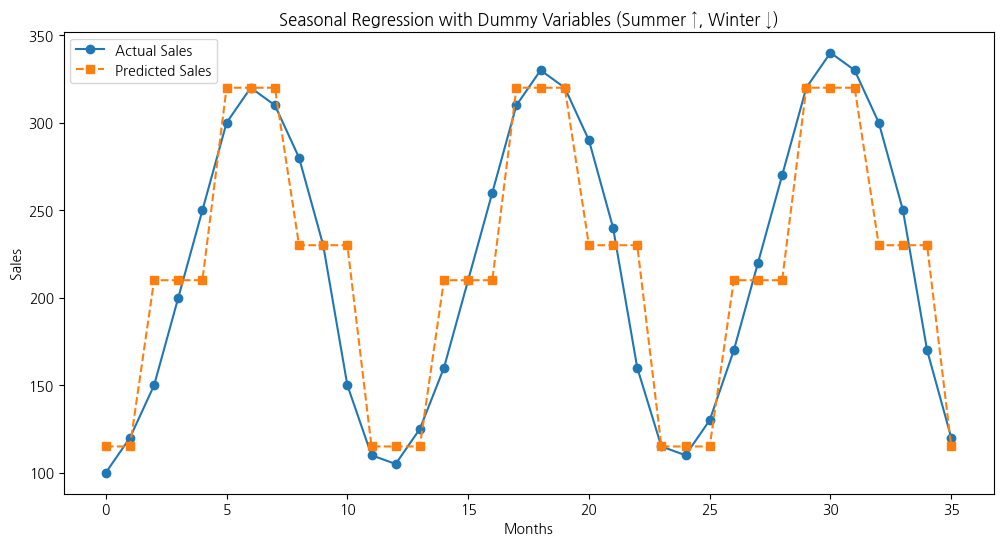


Data with Predictions:
 Year  Month  Sales  Season_Spring  Season_Summer  Season_Winter  Predicted_Sales
 2019      1    100          False          False           True            115.0
 2019      2    120          False          False           True            115.0
 2019      3    150           True          False          False            210.0
 2019      4    200           True          False          False            210.0
 2019      5    250           True          False          False            210.0
 2019      6    300          False           True          False            320.0
 2019      7    320          False           True          False            320.0
 2019      8    310          False           True          False            320.0
 2019      9    280          False          False          False            230.0
 2019     10    230          False          False          False            230.0
 2019     11    150          False          False          False          

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 3년간 월별 매출 데이터 (2019~2021)
data = {
    'Year': [2019]*12 + [2020]*12 + [2021]*12,
    'Month': list(range(1, 13)) * 3,
    'Sales': [
        100, 120, 150, 200, 250, 300, 320, 310, 280, 230, 150, 110,  # 2019년
        105, 125, 160, 210, 260, 310, 330, 320, 290, 240, 160, 115,  # 2020년
        110, 130, 170, 220, 270, 320, 340, 330, 300, 250, 170, 120   # 2021년
    ]
}

df = pd.DataFrame(data)

# 계절 변수 추가
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                             'Spring' if x in [3, 4, 5] else
                                             'Summer' if x in [6, 7, 8] else
                                             'Fall')

# 계절을 더미 변수로 변환 (기준값: Winter) # 패턴 보기위해 회귀계수 구분해주는 역할/원핫 인코딩 여기에 해당하는 데이터만 곱해줌
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# 독립 변수 (X)와 종속 변수 (Y) 설정
X = df.drop(columns=['Sales', 'Year', 'Month'])  # 'Month'는 제거
Y = df['Sales']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, Y)

# 예측
Y_pred = model.predict(X)

# 모델 평가
r2 = r2_score(Y, Y_pred)
print(f"R² Score: {r2:.4f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)

# 예측값 데이터프레임에 추가
df['Predicted_Sales'] = Y_pred

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label="Actual Sales", marker="o")
plt.plot(df.index, df['Predicted_Sales'], label="Predicted Sales", linestyle="--", marker="s")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Seasonal Regression with Dummy Variables (Summer ↑, Winter ↓)")
plt.legend()
plt.show()

# 전체 데이터 출력
print("\nData with Predictions:")
print(df.to_string(index=False))


* 6,7,8월을 기점으로 매출 증감이 반복되는 주기를 갖음.

R² Score: 0.3343

Regression Coefficients:
         Feature  Coefficient
0  Season_Spring  -133.333333
1  Season_Summer    33.333333
2  Season_Winter  -113.333333


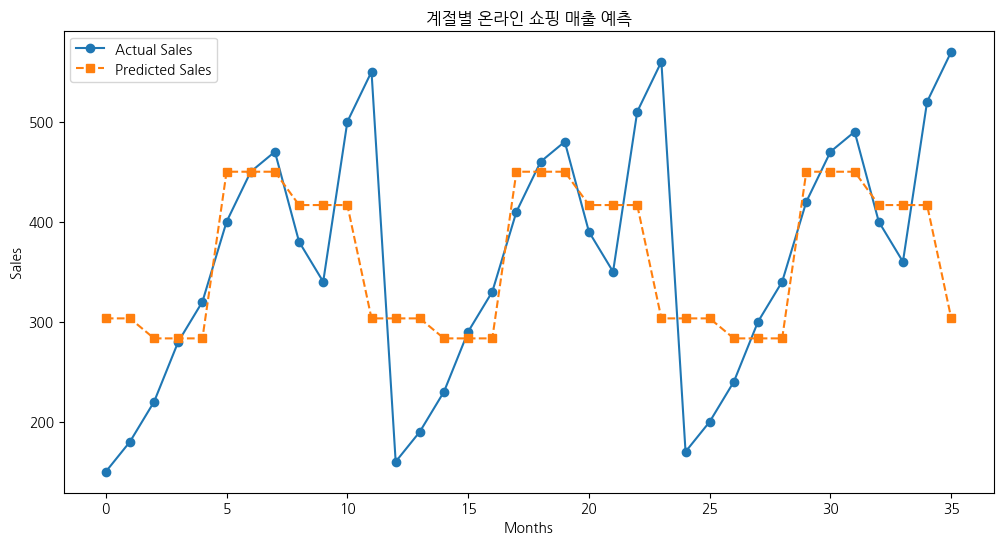


Data with Predictions:
 Year  Month  Sales  Season_Spring  Season_Summer  Season_Winter  Predicted_Sales
 2019      1    150          False          False           True       303.333333
 2019      2    180          False          False           True       303.333333
 2019      3    220           True          False          False       283.333333
 2019      4    280           True          False          False       283.333333
 2019      5    320           True          False          False       283.333333
 2019      6    400          False           True          False       450.000000
 2019      7    450          False           True          False       450.000000
 2019      8    470          False           True          False       450.000000
 2019      9    380          False          False          False       416.666667
 2019     10    340          False          False          False       416.666667
 2019     11    500          False          False          False       416

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = {
    'Year': [2019]*12 + [2020]*12 + [2021]*12,
    'Month': list(range(1, 13)) * 3,
    'Sales': [
        150, 180, 220, 280, 320, 400, 450, 470, 380, 340, 500, 550,  # 2019년
        160, 190, 230, 290, 330, 410, 460, 480, 390, 350, 510, 560,  # 2020년
        170, 200, 240, 300, 340, 420, 470, 490, 400, 360, 520, 570   # 2021년
    ]
}

df=pd.DataFrame(data)

# 계절 변수 추가
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                             'Spring' if x in [3, 4, 5] else
                                             'Summer' if x in [6, 7, 8] else
                                             'Fall')

# 계절을 더미 변수로 변환 (기준값: Winter)
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# 독립 변수 (X)와 종속 변수 (Y) 설정
X = df.drop(columns=['Sales', 'Year', 'Month'])  # 'Month'는 제거
Y = df['Sales']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, Y)

# 예측
Y_pred = model.predict(X)

# 모델 평가
r2 = r2_score(Y, Y_pred)
print(f"R² Score: {r2:.4f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)

# 예측값 데이터프레임에 추가
df['Predicted_Sales'] = Y_pred

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label="Actual Sales", marker="o")
plt.plot(df.index, df['Predicted_Sales'], label="Predicted Sales", linestyle="--", marker="s")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("계절별 온라인 쇼핑 매출 예측")
plt.legend()
plt.show()

# 전체 데이터 출력
print("\nData with Predictions:")
print(df.to_string(index=False))



R² Score: 0.1645

Regression Coefficients:
         Feature  Coefficient
0  Season_Spring  -300.000000
1  Season_Summer   133.333333
2  Season_Winter  -200.000000


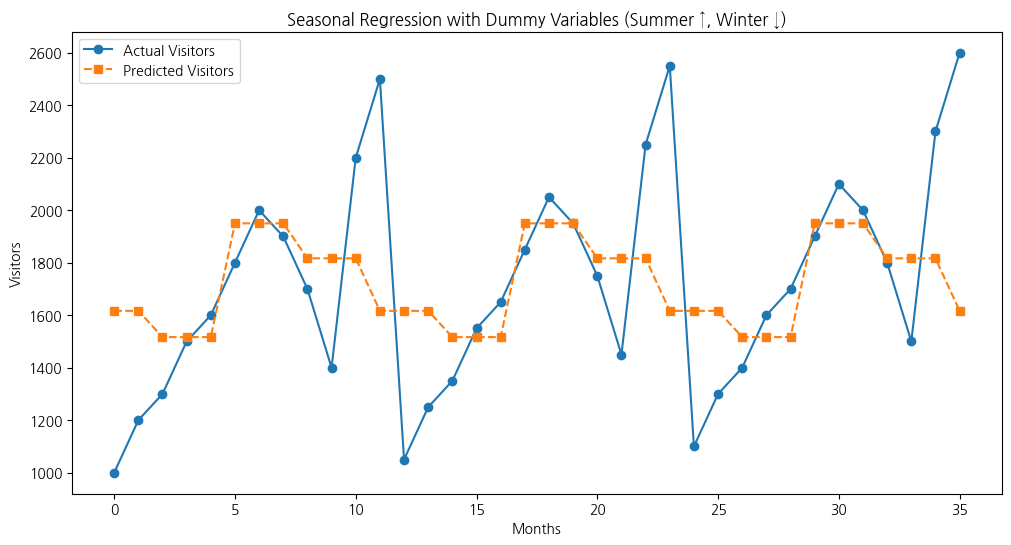


Data with Predictions:
 Year  Month  Visitors  Season_Spring  Season_Summer  Season_Winter  Predicted_Visitors
 2019      1      1000          False          False           True         1616.666667
 2019      2      1200          False          False           True         1616.666667
 2019      3      1300           True          False          False         1516.666667
 2019      4      1500           True          False          False         1516.666667
 2019      5      1600           True          False          False         1516.666667
 2019      6      1800          False           True          False         1950.000000
 2019      7      2000          False           True          False         1950.000000
 2019      8      1900          False           True          False         1950.000000
 2019      9      1700          False          False          False         1816.666667
 2019     10      1400          False          False          False         1816.666667
 2019   

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = {
    'Year': [2019]*12 + [2020]*12 + [2021]*12,
    'Month': list(range(1, 13)) * 3,
    'Visitors': [
        1000, 1200, 1300, 1500, 1600, 1800, 2000, 1900, 1700, 1400, 2200, 2500,  # 2019년
        1050, 1250, 1350, 1550, 1650, 1850, 2050, 1950, 1750, 1450, 2250, 2550,  # 2020년
        1100, 1300, 1400, 1600, 1700, 1900, 2100, 2000, 1800, 1500, 2300, 2600   # 2021년
    ]
}

df = pd.DataFrame(data)

# 계절 변수 추가
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [11, 12, 1, 2] else
                                             'Spring' if x in [3, 4, 5] else
                                             'Summer' if x in [6, 7, 8] else
                                             'Fall')

# 계절을 더미 변수로 변환 (기준값: Winter) # 패턴 보기위해 회귀계수 구분해주는 역할/원핫 인코딩 여기에 해당하는 데이터만 곱해줌
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# 독립 변수 (X)와 종속 변수 (Y) 설정
X = df.drop(columns=['Visitors', 'Year', 'Month'])  # 'Month'는 제거
Y = df['Visitors']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, Y)

# 예측
Y_pred = model.predict(X)

# 모델 평가
r2 = r2_score(Y, Y_pred)
print(f"R² Score: {r2:.4f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)

# 예측값 데이터프레임에 추가
df['Predicted_Visitors'] = Y_pred

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Visitors'], label="Actual Visitors", marker="o")
plt.plot(df.index, df['Predicted_Visitors'], label="Predicted Visitors", linestyle="--", marker="s")
plt.xlabel("Months")
plt.ylabel("Visitors")
plt.title("지역별 대형마트 월별 방문자 수 예측")
plt.legend()
plt.show()

# 전체 데이터 출력
print("\nData with Predictions:")
print(df.to_string(index=False))

R² Score: 0.4753

Regression Coefficients:
                    Feature   Coefficient
0             Season_Spring -10166.666667
1            Season_Vaction  15500.000000
2  Season_year_end_new_year  -8500.000000


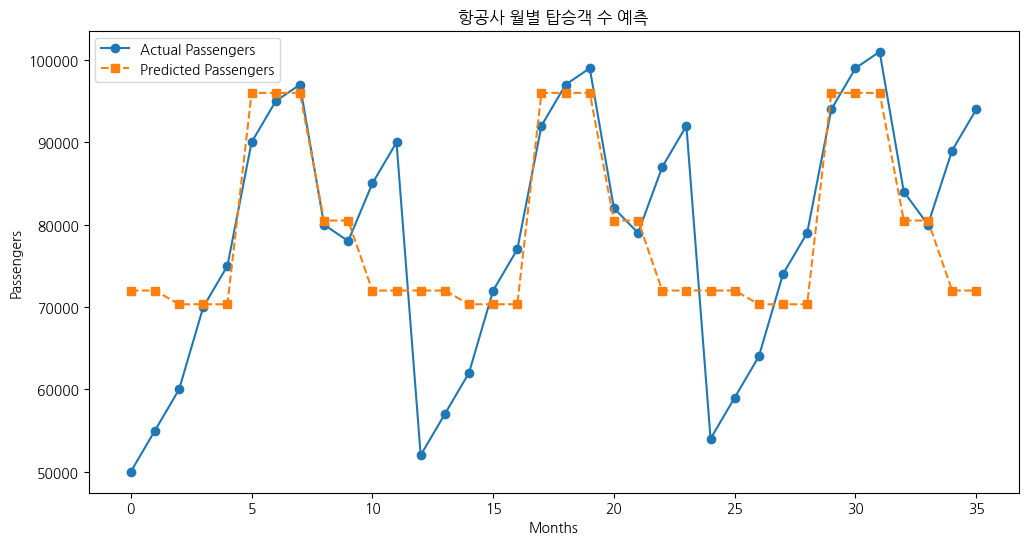


Data with Predictions:
 Year  Month  Passengers  Season_Spring  Season_Vaction  Season_year_end_new_year  Predicted_Passengers
 2019      1       50000          False           False                      True          72000.000000
 2019      2       55000          False           False                      True          72000.000000
 2019      3       60000           True           False                     False          70333.333333
 2019      4       70000           True           False                     False          70333.333333
 2019      5       75000           True           False                     False          70333.333333
 2019      6       90000          False            True                     False          96000.000000
 2019      7       95000          False            True                     False          96000.000000
 2019      8       97000          False            True                     False          96000.000000
 2019      9       80000          False 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = {
    'Year': [2019]*12 + [2020]*12 + [2021]*12,
    'Month': list(range(1, 13)) * 3,
    'Passengers': [
        50000, 55000, 60000, 70000, 75000, 90000, 95000, 97000, 80000, 78000, 85000, 90000,  # 2019년
        52000, 57000, 62000, 72000, 77000, 92000, 97000, 99000, 82000, 79000, 87000, 92000,  # 2020년
        54000, 59000, 64000, 74000, 79000, 94000, 99000, 101000, 84000, 80000, 89000, 94000  # 2021년
    ]
}

df = pd.DataFrame(data)

# 계절 변수 추가
df['Season'] = df['Month'].apply(lambda x: 'year_end_new_year' if x in [11, 12, 1, 2] else
                                             'Spring' if x in [3, 4, 5] else
                                             'Vaction' if x in [6, 7, 8] else
                                             'Fall')

# 계절을 더미 변수로 변환 (기준값: Winter) # 패턴 보기위해 회귀계수 구분해주는 역할/원핫 인코딩 여기에 해당하는 데이터만 곱해줌
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# 독립 변수 (X)와 종속 변수 (Y) 설정
X = df.drop(columns=['Passengers', 'Year', 'Month'])  # 'Month'는 제거
Y = df['Passengers']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, Y)

# 예측
Y_pred = model.predict(X)

# 모델 평가
r2 = r2_score(Y, Y_pred)
print(f"R² Score: {r2:.4f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)

# 예측값 데이터프레임에 추가
df['Predicted_Passengers'] = Y_pred

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label="Actual Passengers", marker="o")
plt.plot(df.index, df['Predicted_Passengers'], label="Predicted Passengers", linestyle="--", marker="s")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("항공사 월별 탑승객 수 예측")
plt.legend()
plt.show()

# 전체 데이터 출력
print("\nData with Predictions:")
print(df.to_string(index=False))

R² Score: 0.9410

Regression Coefficients:
                   Feature  Coefficient
0              Season_Fall      -2250.0
1            Season_Summer      -1350.0
2  Season_half_of_the_year      -3730.0


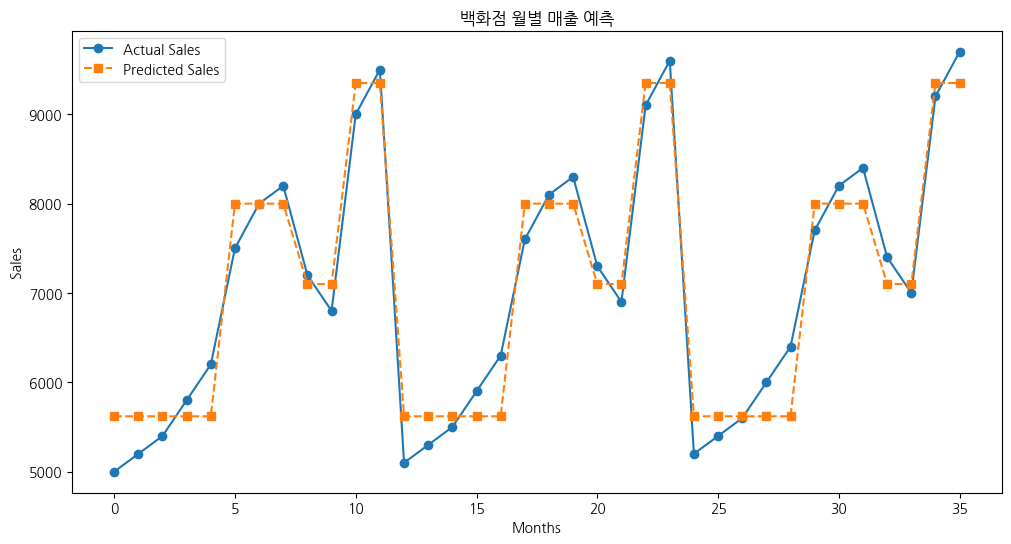


Data with Predictions:
 Year  Month  Sales  Season_Fall  Season_Summer  Season_half_of_the_year  Predicted_Sales
 2019      1   5000        False          False                     True           5620.0
 2019      2   5200        False          False                     True           5620.0
 2019      3   5400        False          False                     True           5620.0
 2019      4   5800        False          False                     True           5620.0
 2019      5   6200        False          False                     True           5620.0
 2019      6   7500        False           True                    False           8000.0
 2019      7   8000        False           True                    False           8000.0
 2019      8   8200        False           True                    False           8000.0
 2019      9   7200         True          False                    False           7100.0
 2019     10   6800         True          False                    False    

In [27]:
data = {
    'Year': [2019]*12 + [2020]*12 + [2021]*12,
    'Month': list(range(1, 13)) * 3,
    'Sales': [
        5000, 5200, 5400, 5800, 6200, 7500, 8000, 8200, 7200, 6800, 9000, 9500,  # 2019년
        5100, 5300, 5500, 5900, 6300, 7600, 8100, 8300, 7300, 6900, 9100, 9600,  # 2020년
        5200, 5400, 5600, 6000, 6400, 7700, 8200, 8400, 7400, 7000, 9200, 9700   # 2021년
    ]
}
df = pd.DataFrame(data)

# 계절 변수 추가
df['Season'] = df['Month'].apply(lambda x: 'End_of_year' if x in [11,12] else
                                             'half_of_the_year' if x in [1,2,3, 4, 5] else
                                             'Summer' if x in [6, 7, 8] else
                                             'Fall')

# 계절을 더미 변수로 변환 (기준값: Winter)
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# 독립 변수 (X)와 종속 변수 (Y) 설정
X = df.drop(columns=['Sales', 'Year', 'Month'])  # 'Month'는 제거
Y = df['Sales']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, Y)

# 예측
Y_pred = model.predict(X)

# 모델 평가
r2 = r2_score(Y, Y_pred)
print(f"R² Score: {r2:.4f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)

# 예측값 데이터프레임에 추가
df['Predicted_Sales'] = Y_pred

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label="Actual Sales", marker="o")
plt.plot(df.index, df['Predicted_Sales'], label="Predicted Sales", linestyle="--", marker="s")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("백화점 월별 매출 예측")
plt.legend()
plt.show()

# 전체 데이터 출력
print("\nData with Predictions:")
print(df.to_string(index=False))


R² Score: 0.8518

Regression Coefficients:
                         Feature  Coefficient
0         Season_Summer_Vacation    56.666667
1                Season_Year_end   166.666667
2  Season_first_half_of_the_year  -219.333333


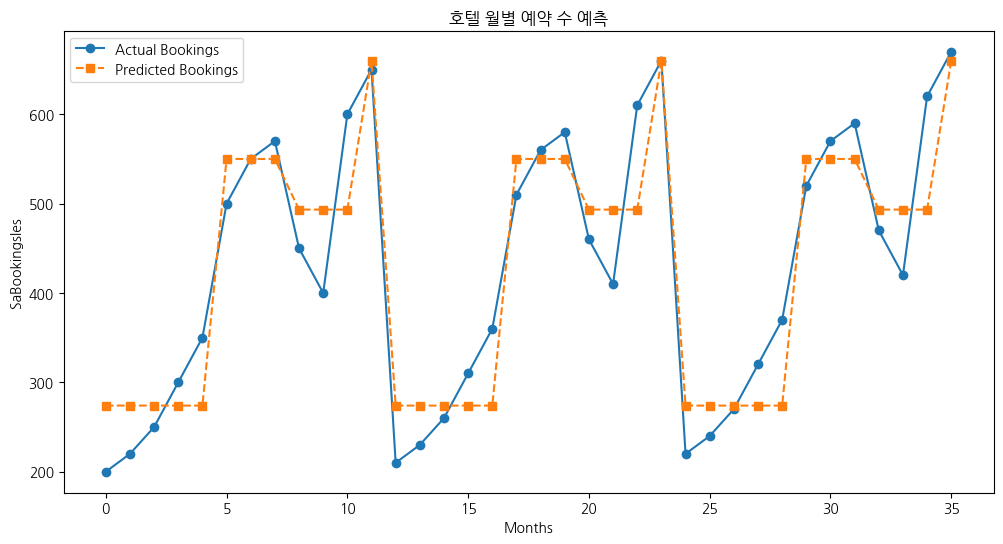


Data with Predictions:
 Year  Month  Bookings  Season_Summer_Vacation  Season_Year_end  Season_first_half_of_the_year  Predicted_Bookings
 2019      1       200                   False            False                           True          274.000000
 2019      2       220                   False            False                           True          274.000000
 2019      3       250                   False            False                           True          274.000000
 2019      4       300                   False            False                           True          274.000000
 2019      5       350                   False            False                           True          274.000000
 2019      6       500                    True            False                          False          550.000000
 2019      7       550                    True            False                          False          550.000000
 2019      8       570                    True          

In [26]:
data = {
    'Year': [2019]*12 + [2020]*12 + [2021]*12,
    'Month': list(range(1, 13)) * 3,
    'Bookings': [
        200, 220, 250, 300, 350, 500, 550, 570, 450, 400, 600, 650,  # 2019년
        210, 230, 260, 310, 360, 510, 560, 580, 460, 410, 610, 660,  # 2020년
        220, 240, 270, 320, 370, 520, 570, 590, 470, 420, 620, 670   # 2021년
    ]
}

df = pd.DataFrame(data)

# 계절 변수 추가
df['Season'] = df['Month'].apply(lambda x: 'Year_end' if x in [12] else
                                             'first_half_of_the_year' if x in [1,2,3, 4, 5] else
                                             'Summer_Vacation' if x in [6, 7, 8] else
                                             'Fall')

# 계절을 더미 변수로 변환 (기준값: Winter)
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# 독립 변수 (X)와 종속 변수 (Y) 설정
X = df.drop(columns=['Bookings', 'Year', 'Month'])  # 'Month'는 제거
Y = df['Bookings']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, Y)

# 예측
Y_pred = model.predict(X)

# 모델 평가
r2 = r2_score(Y, Y_pred)
print(f"R² Score: {r2:.4f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)

# 예측값 데이터프레임에 추가
df['Predicted_Bookings'] = Y_pred

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Bookings'], label="Actual Bookings", marker="o")
plt.plot(df.index, df['Predicted_Bookings'], label="Predicted Bookings", linestyle="--", marker="s")
plt.xlabel("Months")
plt.ylabel("SaBookingsles")
plt.title("호텔 월별 예약 수 예측")
plt.legend()
plt.show()

# 전체 데이터 출력
print("\nData with Predictions:")
print(df.to_string(index=False))